# Titanic Ship Passengers Survival Prediction

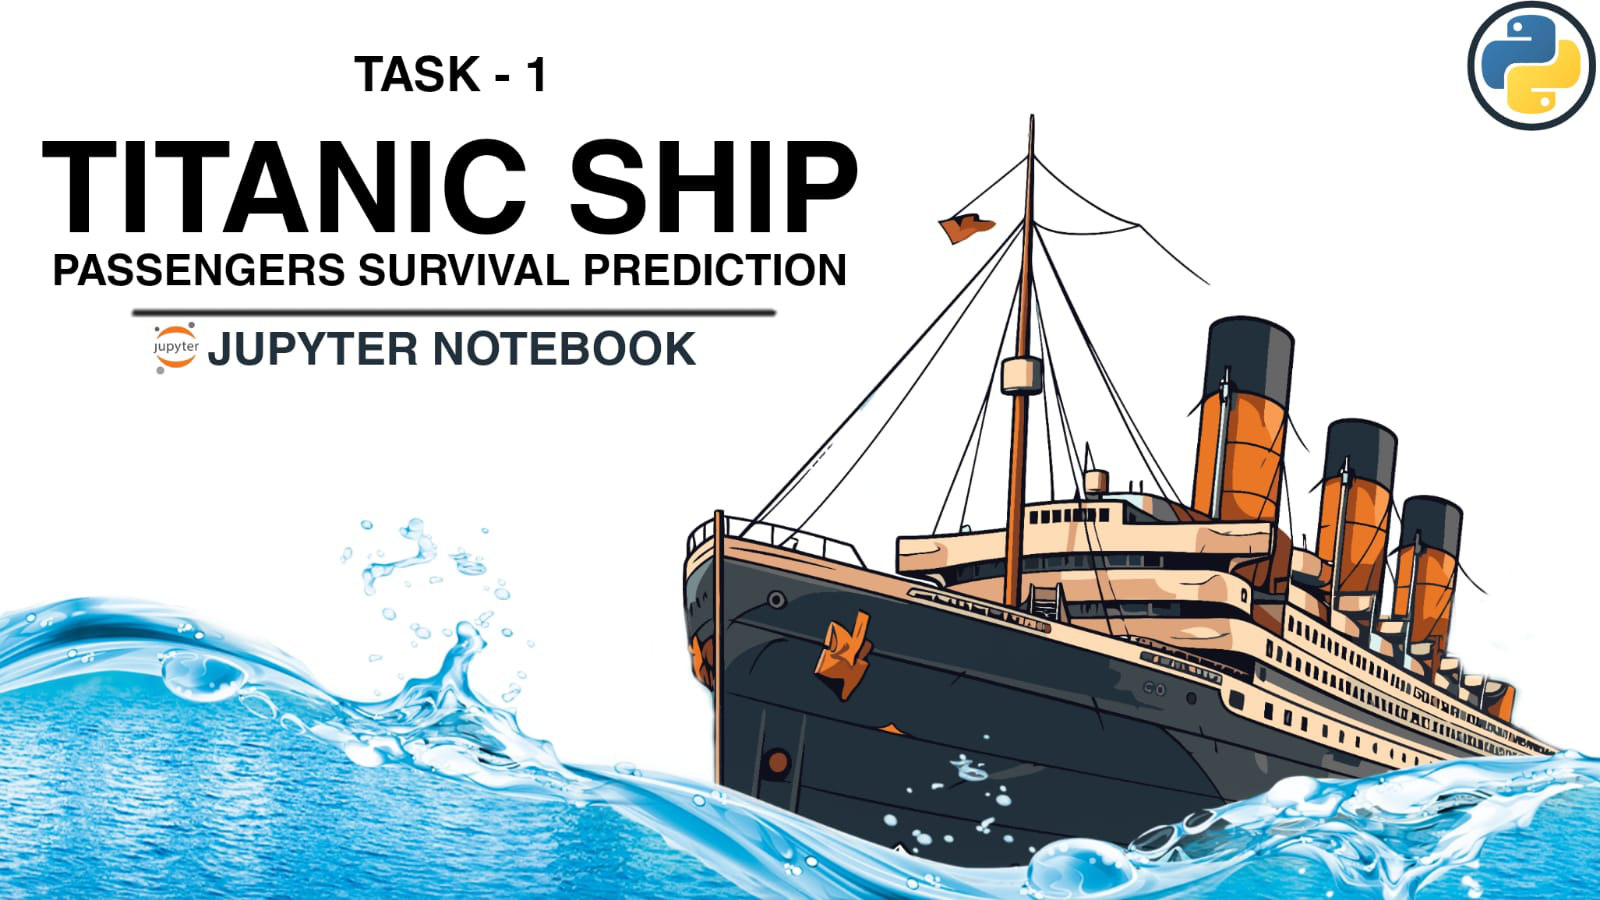

In [67]:
from IPython.display import display
from PIL import Image
image_path = "Titanic Task Banner.jpeg"
img = Image.open(image_path)
display(img)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
titanic = pd.read_csv(r"C:\Users\shubh\Downloads\Titanic-Dataset.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.drop(['PassengerId','Cabin','Name','Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic['Sex'] = titanic['Sex'].map({'male':1, 'female':0})
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
titanic['FamSize'] = titanic['SibSp']+titanic['Parch']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [13]:
titanic.drop(['SibSp','Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [14]:
current_columns = titanic.columns.tolist()

new_column_order = ['Survived', 'Pclass']
new_column_order.append('FamSize')

remaining_columns = ['Sex', 'Age', 'Fare', 'Embarked']
new_column_order.extend(remaining_columns)

for col in current_columns:
    if col not in new_column_order:
        new_column_order.append(col)
titanic = titanic[new_column_order]
titanic

,Survived,Pclass,FamSize,Sex,Age,Fare,Embarked
0,0,3,1,1,22.0,7.2500,2
1,1,1,1,0,38.0,71.2833,0
2,1,3,0,0,26.0,7.9250,2
3,1,1,1,0,35.0,53.1000,2
4,0,3,0,1,35.0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,0,1,27.0,13.0000,2
887,1,1,0,0,19.0,30.0000,2
888,0,3,3,0,28.0,23.4500,2
889,1,1,0,1,26.0,30.0000,0


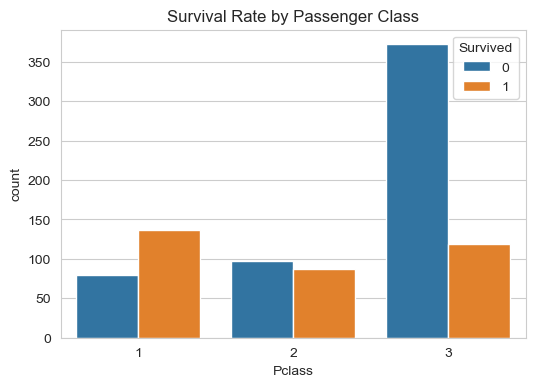

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x="Pclass", hue="Survived")
plt.title("Survival Rate by Passenger Class")
plt.show()

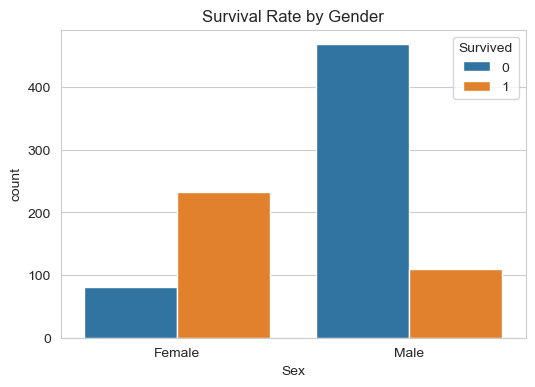

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x="Sex", hue="Survived")
plt.title("Survival Rate by Gender")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])  # Change x-axis labels
plt.show()

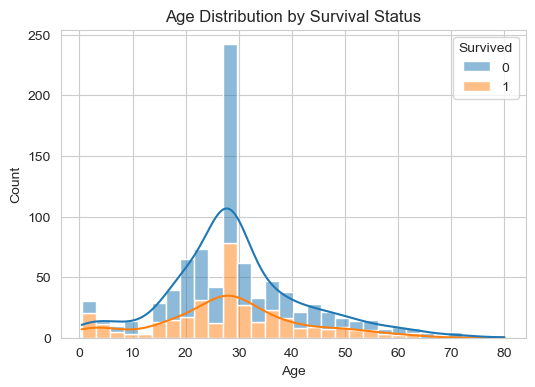

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic, x="Age", hue="Survived", multiple="stack", kde=True)
plt.title("Age Distribution by Survival Status")
plt.show()

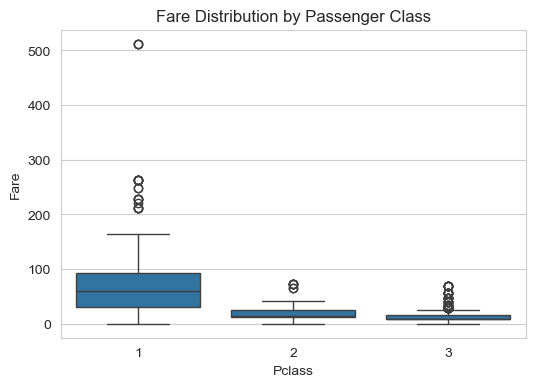

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=titanic, x="Pclass", y="Fare")
plt.title("Fare Distribution by Passenger Class")
plt.show()

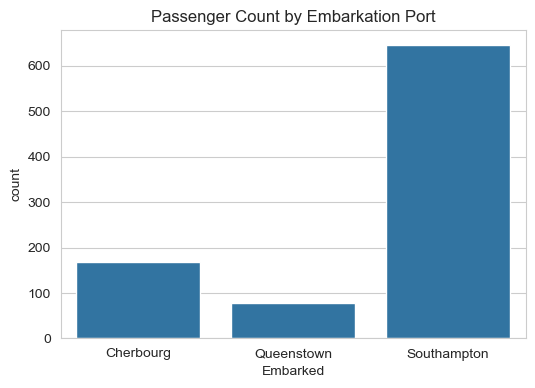

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x="Embarked")
plt.title("Passenger Count by Embarkation Port")
plt.xticks(ticks=[0, 1, 2], labels=["Cherbourg", "Queenstown", "Southampton"])  # Map numeric to actual names
plt.show()

In [20]:
feature_columns = ['Pclass', 'FamSize', 'Sex', 'Age', 'Embarked']
x = titanic[feature_columns]
x.head()

,Pclass,FamSize,Sex,Age,Embarked
0,3,1,1,22.0,2
1,1,1,0,38.0,0
2,3,0,0,26.0,2
3,1,1,0,35.0,2
4,3,0,1,35.0,2


In [21]:
y = titanic['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [23]:
x_train.shape

(623, 5)

In [24]:
x_test.shape

(268, 5)

In [25]:
y_train.shape

(623,)

In [26]:
y_test.shape

(268,)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

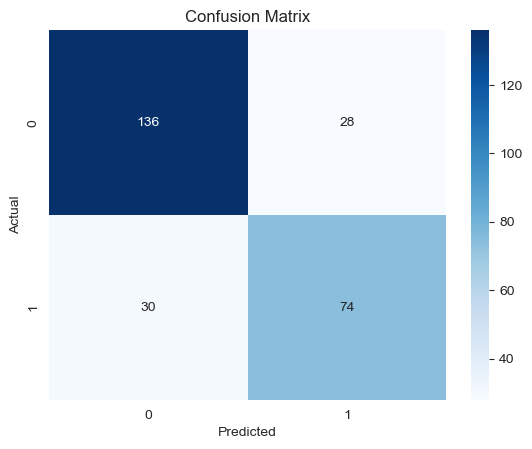

In [30]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.7836
Confusion Matrix:
[[136  28]
 [ 30  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       164
           1       0.73      0.71      0.72       104

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [32]:
def predict_survival(pclass, famsize, sex, age, embarked, model):
    if pclass not in [1, 2, 3] or sex not in [0, 1] or embarked not in [0, 1, 2]:
        return "Invalid input: Check pclass (1-3), sex (0-Female, 1-Male), and embarked (0-C, 1-Q, 2-S)."

    # Create input DataFrame matching training features
    input_data = pd.DataFrame([[pclass, famsize, sex, age, embarked]], 
                              columns=['Pclass', 'FamSize', 'Sex', 'Age', 'Embarked'])

    prediction = model.predict(input_data)[0]
    return "Survived" if prediction == 1 else "Not Survived"

# Get user input
try:
    pclass = int(input("Enter Passenger Class (1, 2, 3): ").strip())
    famsize = int(input("Enter Family Size (SibSp + Parch): ").strip())
    sex = int(input("Enter Sex (0 for Female, 1 for Male): ").strip())
    age = float(input("Enter Age: ").strip())
    embarked = int(input("Enter Embarkation (0-Cherbourg, 1-Queenstown, 2-Southampton): ").strip())

    # Predict survival
    result = predict_survival(pclass, famsize, sex, age, embarked, model)
    print(f"\nPrediction Result: {result}")

except ValueError as e:
    print(f"\nInvalid input! Please enter valid numeric values. Error: {e}")

Enter Passenger Class (1, 2, 3):  1
Enter Family Size (SibSp + Parch):  2
Enter Sex (0 for Female, 1 for Male):  1
Enter Age:  60
Enter Embarkation (0-Cherbourg, 1-Queenstown, 2-Southampton):  2



Prediction Result: Not Survived
